In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10  # Importing the cifar10 module
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range 0-1
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=3,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5239 - loss: 1.3271 - val_accuracy: 0.5900 - val_loss: 1.1496
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6138 - loss: 1.0887 - val_accuracy: 0.6463 - val_loss: 1.0114
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.6645 - loss: 0.9589 - val_accuracy: 0.6783 - val_loss: 0.9279


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 5s - 15ms/step - accuracy: 0.6783 - loss: 0.9279

Test accuracy: 0.6783


In [12]:
import tensorflow as tf # Importing the tensorflow library and aliasing it as 'tf'

# Load the best saved model
best_model = tf.keras.models.load_model('best_model.keras')

# Select a few test images
num_images = 7
predictions = best_model.predict(x_test[:num_images])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:num_images], axis=1)

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


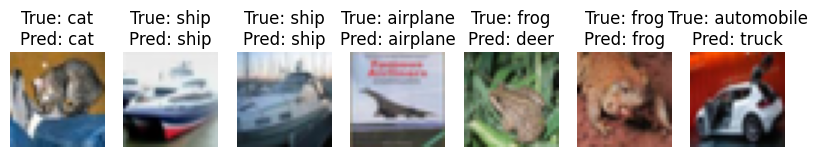

In [13]:
# Plot test images with predictions
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')

plt.show()
